In [93]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# numpy: Chiziqli va polinomial regressiya uchun kerakli ma'lumotlarni yaratishda va matematik hisob-kitoblar uchun ishlatiladi.
# matplotlib.pyplot: Grafiklar yaratish va natijalarni vizual ko‘rish uchun ishlatiladi.
# train_test_split: Ma'lumotlarni o‘qitish va test qilish to‘plamlariga ajratish uchun ishlatiladi.
# PolynomialFeatures: Polinomial regressiya modelini yaratishda ishlatiladi. Bu, asl xususiyatlardan polinomial xususiyatlar yaratish uchun kerak.
# LinearRegression: Chiziqli regressiya modelini yaratish uchun ishlatiladi.
# mean_absolute_error, mean_squared_error, r2_score: Modelning to‘g‘riligini o‘lchash uchun

In [95]:
X = np.linspace(-25, 33, 85).reshape(-1, 5)
np.random.seed(42)
y = 4 * X**2 + 4 * X + 4 + np.random.normal(0, 25, size=X.shape)
# np.linspace(-25, 33, 85): Bu kodda X uchun 85 ta nuqtadan iborat bo'lgan chiziqli bo'shliq yaratilyapti. Bu nuqtalar -25 dan 33 gacha bo‘lgan oraliqda teng masofada joylashgan. Ya'ni, bu X qiymatlari bo‘ladi.
# .reshape(-1, 5): Bu qism X ma'lumotlarini 5 ustunli shaklda o'zgartiradi. -1 esa, X ni kerakli uzunlikda bo'lishi uchun avtomatik ravishda hisoblashni bildiradi. Natijada 17 qator va 5 ustundan iborat ma'lumotlar hosil bo‘ladi.
# np.random.seed(42): Tasodifiy sonlar generatsiyasini qayta-qayta takrorlanadigan qilish uchun boshlang'ich urug' (seed) ni belgilaydi. Shu tarzda, siz har safar shu kodni ishga tushirganingizda bir xil tasodifiy sonlar olish mumkin bo'ladi.
# y = 4 * X**2 + 4 * X + 4 + np.random.normal(0, 25, size=X.shape): Bu qismda, y qiymatlari polinomial ifodadan (4 * X² + 4 * X + 4) va tasodifiy shovqin (normal taqsimotdan olingan) aralashmasidan hisoblanadi. Shovqinning o'rtacha qiymati 0 va dispersiyasi 25 ga teng bo'ladi, bu esa modelga xato qo'shadi.
# Shu tarzda, X va y ma'lumotlar to'plami polinomial munosabatga asoslangan, lekin shovqinli (noaniq) o'lchovlarni o'z ichiga oladi.

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test: Bu yerda X_train va y_train – o'qitish to'plami uchun input (X) va output (y) ma'lumotlari, X_test va y_test esa test to'plami uchun input (X) va output (y) ma'lumotlari bo'ladi.
# train_test_split(X, y, test_size=0.2, random_state=42):
# X va y – bu ma'lumotlar to'plamlaridir. X - input ma'lumotlar (xususiyatlar), y - output ma'lumotlar (yagona o'zgaruvchi).
# test_size=0.2: Test to'plami ma'lumotlarining ulushi 0.2, ya'ni 20% bo'ladi. Demak, qolgan 80% o'qitish (train) uchun ishlatiladi.
# random_state=42: Bu parametr tasodifiy ajratishni takrorlanadigan qilish uchun kerak, ya'ni har safar kodni ishga tushirganingizda natijalar bir xil bo'ladi.
# Bu qismda ma'lumotlar to'plamidan 80% o'qitish uchun va 20% test qilish uchun ajratilgan.

In [99]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly = PolynomialFeatures(degree=2)

# Bu kod polinomial xususiyatlarni yaratish uchun PolynomialFeatures ob'ektini yaratadi.
# degree=2: Bu parametru polinomial xususiyatlarning darajasini belgilaydi. Bu holda daraja 2, ya'ni ikkilamchi (X²) xususiyatlar yaratish uchun ishlatiladi. Xususiyatlar to'plami quyidagi shaklda bo'ladi: 
# X_train_poly = poly.fit_transform(X_train):
# fit_transform(X_train): Bu metod X_train ma'lumotlari asosida polinomial xususiyatlarni yaratadi. Ya'ni, X_train ning asl qiymatlaridan tashqari, ularning kvadratlarini ham qo‘shadi.
# Natijada, X_train_poly ma'lumotlar to'plami yangi polinomial xususiyatlar bilan kengayadi.
# X_test_poly = poly.transform(X_test):
# transform(X_test): Bu metod X_test ma'lumotlariga polinomial xususiyatlarni qo‘shadi. Bu yerda fit emas, faqat transformatsiya amalga oshiriladi, chunki X_train da hosil bo'lgan polinomial xususiyatlar asosida X_test uchun yangi xususiyatlar yaratish kerak.
# Natijada, sizning X_train_poly va X_test_poly ma'lumotlar to'plamingiz polinomial xususiyatlarga ega bo'ladi (masalan, 

In [117]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

# model = LinearRegression():

# LinearRegression – bu chiziqli regressiya modelini yaratadi. Chiziqli regressiya (Linear Regression) – bu ma'lumotlar to'plamidagi xususiyatlar (features) va natijalar (target) o'rtasida chiziqli munosabatni o'rganadigan model.

# model – bu o'zingiz yaratgan ob'ekt bo'lib, endi u linear regressiya modelini ifodalaydi.

# model.fit(X_train_poly, y_train):

# fit() metodi modelni o'qitish (training) jarayonini boshlaydi. Bu metodga ikki argument uzatiladi:

# X_train_poly – bu sizning o'qitish (train) ma'lumotlar to'plamingiz bo'lib, unda polinomial xususiyatlar mavjud. Boshqacha aytganda, bu X_train ning kvadratli (yoki boshqa darajadagi) versiyasi.

# y_train – bu haqiqiy maqsad qiymatlari, ya'ni o'qitish to'plamining javoblari (y).

# Model fit() yordamida X_train_poly va y_train ma'lumotlariga asoslanib o'rganadi va o'qitiladi. Model o'qitish jarayonida, X_train_poly ma'lumotlaridan yordanib y_train qiymatlarini bashorat qilish uchun chiziqli regressiya modeli parametrlarini (masalan, og'irliklar) hisoblab chiqadi.

# Qanday ishlaydi:
# Modelni o'qitish: fit() metodi X_train_poly va y_train yordamida modelni o'rgatadi. Bu jarayon modelning parametrlarini optimallashtirish uchun kerakli hisoblashlarni amalga oshiradi.

# Natija: O'qitilgan modelni keyinchalik yangi, ko'rilmagan ma'lumotlar bo'yicha bashoratlar qilish uchun ishlatishingiz mumkin.

# Bu o'qitish jarayonidan so'ng, model X_test_poly (test to'plami) ma'lumotlariga asoslanib bashorat qilish uchun tayyor bo'ladi.

# Endi model o'qitilgan, va predict() metodidan foydalanib, X_test_poly orqali test ma'lumotlari bilan bashoratlarni olishingiz mumkin.

LinearRegression()

In [119]:
y_pred = model.predict(X_test_poly)
# model.predict(X_test_poly) metodini ishlatib, test ma'lumotlari bo‘yicha bashorat qilishni amalga oshiryapsiz. Keling, bu qismni tushuntiraman:
# y_pred = model.predict(X_test_poly):
# predict(X_test_poly): Bu metod test to'plamidagi polinomial xususiyatlarga asoslangan holda model tomonidan bashorat qilingan y qiymatlarini hisoblaydi.
# X_test_poly: Bu yerda polinomial xususiyatlar bilan kengaytirilgan test ma'lumotlari. Model bu ma'lumotlar asosida y_pred (bashorat qilingan natijalar) ni hisoblaydi.
# Natijada, y_pred o'zgaruvchisi model tomonidan X_test_poly ma'lumotlaridan olingan bashorat qilingan y qiymatlarini saqlaydi.

In [121]:

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


# modelning ishlashini baholash uchun bir nechta muhim ko'rsatkichlarni hisoblab chiqqansiz. Keling, har birini tushuntiraman:

# mae = mean_absolute_error(y_test, y_pred):
# MAE (Mean Absolute Error) – bu bashorat qilingan va haqiqiy qiymatlar orasidagi mutlaq farqlarning o'rtacha qiymatidir.
# Bu ko'rsatkich modelning umumiy aniqligini ko'rsatadi. MAE past bo'lsa, model yaxshi ishlaydi.


# mse = mean_squared_error(y_test, y_pred):
# MSE (Mean Squared Error) – bu bashorat qilingan va haqiqiy qiymatlar orasidagi kvadrat farqlarning o'rtacha qiymatidir.
# Bu ko'rsatkich katta xatolarni yanada kuchliroq jazolaydi, chunki farqlar kvadrat shaklida olinadi.

# rmse = np.sqrt(mse):
# RMSE (Root Mean Squared Error) – bu MSE ning kvadrat ildizidir. Bu ko'rsatkich MSE ning o'lchamini asl ko'rsatkichlar bilan solishtirishga yordam beradi.
# RMSE ko'rsatkichi xatoliklarni o'lchashda juda foydalidir, chunki u asl birliklarda ifodalangan bo'ladi.

# r2 = r2_score(y_test, y_pred):
# R² (R-squared) – bu modelning ma'lumotlarga qanchalik yaxshi moslashganini o'lchash uchun ishlatiladi. R² ko'rsatkichi 1 ga yaqin bo'lsa, model ma'lumotlarga juda yaxshi mos keladi. Agar R² manfiy bo'lsa, model juda yomon ishlamoqda degan ma'noni anglatadi.
# Bu ko'rsatkich ma'lumotlarning umumiy variatsiyasiga nisbatan modelning tushuntirish qobiliyatini o'lchaydi.

# Shu bilan, sizning modelni baholash uchun kerakli barcha asosiy ko'rsatkichlaringiz hisoblangan. Agar xatoliklar kichik bo'lsa va R² katta bo'lsa, demak model yaxshi ishlaydi.

In [123]:
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)
# Ushbu kod yordamida, siz MAE, MSE, RMSE, va R² ko'rsatkichlarining qiymatlarini konsolga chiqarishingiz mumkin. Bu ko'rsatkichlar sizga modelning aniqligi va samaradorligini baholashda yordam beradi.

Mean Absolute Error (MAE): 24.911652344403105
Mean Squared Error (MSE): 1292.4182315227135
Root Mean Squared Error (RMSE): 35.950218796590285
R^2 Score: 0.9990944032801352


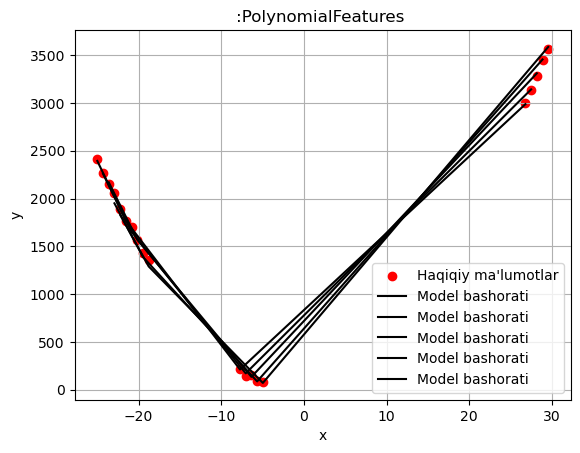

In [125]:
plt.scatter(X_test, y_test, color='red', label='Haqiqiy ma\'lumotlar')
plt.plot(X_test, y_pred, color='black', label='Model bashorati')
plt.title(":PolynomialFeatures ")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# matplotlib yordamida haqiqiy ma'lumotlar va modelning bashoratlarini vizual ko‘rmoqdasiz. Bu kodda quyidagi qadamlar bajariladi:
# plt.scatter(X_test, y_test, color='red', label='Haqiqiy ma\'lumotlar'):
# Bu qismda X_test va y_test haqiqiy test ma'lumotlari nuqtalari qizil rangda chiziladi.
# label='Haqiqiy ma'lumotlar' legendada ushbu nuqtalarni ta'riflaydi.
# plt.plot(X_test, y_pred, color='black', label='Model bashorati'):
# Bu yerda X_test bo'yicha modelning bashorat qilingan qiymatlari qora rangda chiziladi.
# label='Model bashorati' legendada ushbu chiziqni ta'riflaydi.
# plt.title(":PolynomialFeatures "):
# Grafikning sarlavhasi belgilanadi.
# plt.xlabel("x") va plt.ylabel("y"):
# X va Y o'qilari uchun nomlar qo'yiladi.
# plt.legend():
# Grafikdagi legendani (qo'llanma) ko'rsatish uchun ishlatiladi.
# plt.grid(True):
# Grafikda tarmoq chizig'ini ko'rsatadi, bu esa grafikni o'qishni osonlashtiradi.
# plt.show():
# Grafikni ekranda ko'rsatadi.
# Bu kod yordamida haqiqiy ma'lumotlar va modelning bashoratlarini solishtiruvchi chiroyli grafik hosil qilinadi.